In [1]:
import sys

In [2]:
%pylab inline
import pandas as pd
import catboost as cat

Populating the interactive namespace from numpy and matplotlib


# lgb

In [3]:
params= !ls *param*.csv|grep lgb
params

['lgb_params.fair.grid1.csv',
 'lgb_params.huber.grid1.csv',
 'lgb_params.regression_l1f1.grid1.csv',
 'lgb_params.regression_l1f1.grid2.csv',
 'lgb_params.regression_l1f2.grid1.csv',
 'lgb_params.regression_l1f4.grid1.csv',
 'lgb_params.regression_l1f6.grid1.csv',
 'lgb_params.regression_l1.grid1.csv',
 'lgb_params.regression_l1.grid2.csv',
 'lgb_params.regression_l1.grid3.csv']

In [4]:
keys=['fair','huber','l1.g','l1f1','l1f2','l1f4','l1f6']

In [5]:
def f(k,n=10):
    files=[u for u in params if k in u]
    print k,files
    df=pd.concat([pd.read_csv(u,index_col=0) for u in files]).sort_values("score")
    df['params']=df['params'].map(lambda u: eval(u))
    df['percent']=df['score']/df['score'].min()
    print df.shape
    plt.hist(df['percent']);plt.show()
    pdf=pd.DataFrame(dict(enumerate(df[:n]['params'].map(lambda u: pd.Series(u)).values))).T
    pdf['score']=df[:n]['score'].values
    display(pdf)
    param={}
    for col in pdf.columns:
        if col=='score': continue
        vc=pdf[col].value_counts().sort_values(ascending=False)
        param[str(col)]=vc.index[0]
    return param

In [6]:
xg_params={}

In [7]:
i=0
key=keys[i]
param=f(keys[i])

fair ['lgb_params.fair.grid1.csv']
(432, 3)


C colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0  0.001              0.7         2          0.01     127               20   
1   0.01              0.7         2          0.01     127               30   
2  0.001              0.7         2          0.01     255               30   
3   0.01              0.7         2          0.01     255               20   
4  0.001              0.5         1          0.01     255               10   
5   0.01              0.5         1          0.01     255               30   
6  0.001              0.7         1          0.01     127               10   
7   0.01              0.7         2          0.01     127               10   
8   0.01              0.5         2          0.01     127               30   
9  0.001              0.5         2          0.01     127               30   

  min_sum_hessian_in_leaf num_leaves objective subsample     score  
0                   0.001        127      fair       0.8  0.067666  
1                    0.01        255      fair       0.8  0.067668  
2                    0.01        127      fair       0.8  0.067669  
3                   0.001        255      fair       0.8  0.067670  
4                     0.1        255      fair       0.8  0.067670  
5                    0.01        127      fair       0.8  0.067671  
6                     0.1        255      fair       0.8  0.067672  
7                     0.1        127      fair       0.8  0.067673  
8                    0.01        127      fair       0.8  0.067673  
9                    0.01        127      fair       0.8  0.067673

In [8]:
xg_params[key]=param
param

{'C': 0.01,
 'colsample_bytree': 0.69999999999999996,
 'lambda_l2': 2,
 'learning_rate': 0.01,
 'max_bin': 127,
 'min_data_in_leaf': 30,
 'min_sum_hessian_in_leaf': 0.01,
 'num_leaves': 127,
 'objective': 'fair',
 'subsample': 0.80000000000000004}

huber ['lgb_params.huber.grid1.csv']
(432, 3)


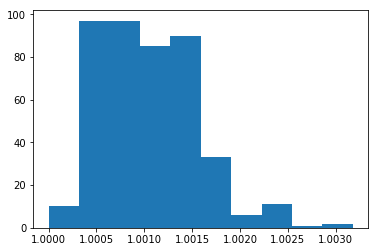

C colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0  0.01              0.7         1          0.01     127               30   
1  0.01              0.5         2          0.01     255               30   
2  0.01              0.5         2          0.01     255               10   
3  0.01              0.5         2          0.01     255               20   
4  0.01              0.5         1          0.01     255               30   
5  0.01              0.5         1          0.01     127               30   
6  0.01              0.7         1          0.01     127               30   
7  0.01              0.7         2          0.01     127               30   
8  0.01              0.5         1          0.01     127               30   
9  0.01              0.7         1          0.01     255               30   

  min_sum_hessian_in_leaf num_leaves objective subsample     score  
0                   0.001        255     huber       0.8  0.067658  
1                   0.001        255     huber       0.8  0.067668  
2                   0.001        255     huber       0.8  0.067670  
3                     0.1        255     huber       0.8  0.067673  
4                   0.001        255     huber       0.8  0.067674  
5                    0.01        255     huber       0.8  0.067676  
6                    0.01        255     huber       0.8  0.067677  
7                     0.1        255     huber       0.8  0.067678  
8                   0.001        255     huber       0.8  0.067678  
9                    0.01        255     huber       0.8  0.067678

In [9]:
i=1
key=keys[i]
param=f(keys[i])

In [10]:
xg_params[key]=param
param

{'C': 0.01,
 'colsample_bytree': 0.5,
 'lambda_l2': 1,
 'learning_rate': 0.01,
 'max_bin': 255,
 'min_data_in_leaf': 30,
 'min_sum_hessian_in_leaf': 0.001,
 'num_leaves': 255,
 'objective': 'huber',
 'subsample': 0.80000000000000004}

In [11]:
i=2
key=keys[i]
param=f(keys[i])

l1.g ['lgb_params.regression_l1.grid1.csv', 'lgb_params.regression_l1.grid2.csv', 'lgb_params.regression_l1.grid3.csv']
(636, 3)


colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0              0.7         1          0.01     255               70   
1              0.7         1          0.01     127               70   
2              0.7         2          0.01     127               70   
3              0.5         2          0.01     127               70   
4              0.5         2          0.01     127               50   
5              0.5         2          0.01     255               70   
6              0.7         2          0.01     127               70   
7              0.5         1          0.01     127               70   
8              0.5         1          0.01     255               70   
9              0.7         2          0.01     127               70   

  min_sum_hessian_in_leaf num_leaves      objective subsample     score  
0                  0.0001        255  regression_l1       0.8  0.067739  
1                   0.001        255  regression_l1       0.8  0.067741  
2                   0.001        255  regression_l1       0.8  0.067742  
3                  0.0001        255  regression_l1       0.8  0.067744  
4                  0.0001        255  regression_l1       0.8  0.067745  
5                   0.001        255  regression_l1       0.8  0.067745  
6                   0.001        511  regression_l1       0.8  0.067746  
7                  0.0001        511  regression_l1       0.8  0.067746  
8                   0.001        511  regression_l1       0.8  0.067749  
9                  0.0001        511  regression_l1       0.8  0.067749

In [12]:
xg_params[key]=param
param

{'colsample_bytree': 0.5,
 'lambda_l2': 2,
 'learning_rate': 0.01,
 'max_bin': 127,
 'min_data_in_leaf': 70,
 'min_sum_hessian_in_leaf': 0.0001,
 'num_leaves': 255,
 'objective': 'regression_l1',
 'subsample': 0.80000000000000004}

In [13]:
i=3
key=keys[i]
param=f(keys[i])

l1f1 ['lgb_params.regression_l1f1.grid1.csv', 'lgb_params.regression_l1f1.grid2.csv']
(480, 3)


C colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0  0.01              0.7         1          0.01     127               70   
1  0.01              0.5         0          0.01     255               50   
2  0.01              0.7         1          0.01     255               70   
3  0.03              0.5         0          0.01     127               70   
4  0.01              0.5         0          0.01     127               70   
5  0.01              0.7         0          0.01     255               50   
6  0.03              0.7         0          0.01     255               70   
7  0.03              0.5         1          0.01     127               50   
8  0.01              0.5         1          0.01     127               30   
9  0.01              0.5         1          0.01     255               70   

  min_sum_hessian_in_leaf num_leaves        objective subsample     score  
0                    0.01        255  regression_l1f1       0.8  0.067703  
1                    0.01        255  regression_l1f1       0.8  0.067710  
2                    0.01        255  regression_l1f1       0.8  0.067712  
3                    0.01        255  regression_l1f1       0.8  0.067714  
4                    0.01        255  regression_l1f1       0.8  0.067715  
5                    0.01        255  regression_l1f1       0.8  0.067716  
6                    0.01        255  regression_l1f1       0.8  0.067716  
7                    0.01        255  regression_l1f1       0.8  0.067718  
8                   0.001        255  regression_l1f1       0.8  0.067720  
9                    0.01        255  regression_l1f1       0.8  0.067721

In [14]:
xg_params[key]=param
param

{'C': 0.01,
 'colsample_bytree': 0.5,
 'lambda_l2': 0,
 'learning_rate': 0.01,
 'max_bin': 255,
 'min_data_in_leaf': 70,
 'min_sum_hessian_in_leaf': 0.01,
 'num_leaves': 255,
 'objective': 'regression_l1f1',
 'subsample': 0.80000000000000004}

l1f2 ['lgb_params.regression_l1f2.grid1.csv']
(432, 3)


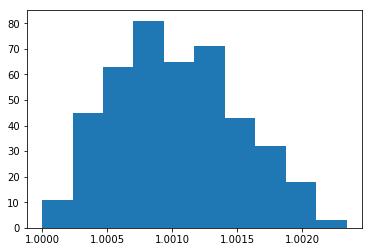

C colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0  0.001              0.7         1          0.01     255               30   
1  0.001              0.5         1          0.01     255               30   
2  0.001              0.5         2          0.01     255               30   
3  0.001              0.5         1          0.01     127               30   
4  0.001              0.5         0          0.01     255               30   
5  0.001              0.5         0          0.01     255               30   
6  0.001              0.7         2          0.01     127               30   
7  0.001              0.5         2          0.01     255               30   
8  0.001              0.5         0          0.01     255               30   
9  0.001              0.5         2          0.01     127               30   

  min_sum_hessian_in_leaf num_leaves        objective subsample     score  
0                     0.1        255  regression_l1f2       0.8  0.067711  
1                   0.001        255  regression_l1f2       0.8  0.067713  
2                    0.01        255  regression_l1f2       0.8  0.067715  
3                    0.01        127  regression_l1f2       0.8  0.067719  
4                    0.01        255  regression_l1f2       0.8  0.067720  
5                     0.1        127  regression_l1f2       0.8  0.067722  
6                     0.1        255  regression_l1f2       0.8  0.067724  
7                     0.1        255  regression_l1f2       0.8  0.067725  
8                   0.001        255  regression_l1f2       0.8  0.067725  
9                   0.001        255  regression_l1f2       0.8  0.067726

In [15]:
i=4
key=keys[i]
param=f(keys[i])

In [16]:
xg_params[key]=param
param

{'C': 0.001,
 'colsample_bytree': 0.5,
 'lambda_l2': 2,
 'learning_rate': 0.01,
 'max_bin': 255,
 'min_data_in_leaf': 30,
 'min_sum_hessian_in_leaf': 0.10000000000000001,
 'num_leaves': 255,
 'objective': 'regression_l1f2',
 'subsample': 0.80000000000000004}

l1f4 ['lgb_params.regression_l1f4.grid1.csv']
(432, 3)


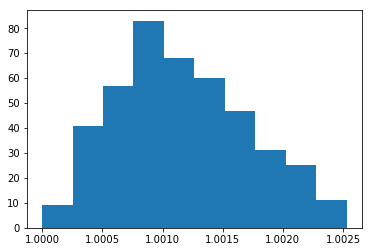

C colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0  0.01              0.5         2          0.01     255               30   
1  0.01              0.5         0          0.01     255               30   
2  0.01              0.5         2          0.01     255               30   
3  0.01              0.7         1          0.01     255               30   
4  0.01              0.5         0          0.01     255               30   
5  0.01              0.5         2          0.01     127               30   
6  0.01              0.5         1          0.01     255               30   
7  0.01              0.5         0          0.01     255               30   
8  0.01              0.5         0          0.01     127               30   
9  0.01              0.5         2          0.01     255               30   

  min_sum_hessian_in_leaf num_leaves        objective subsample     score  
0                    0.01        127  regression_l1f4       0.8  0.067717  
1                     0.1        255  regression_l1f4       0.8  0.067723  
2                   0.001        255  regression_l1f4       0.8  0.067726  
3                   0.001        255  regression_l1f4       0.8  0.067727  
4                    0.01        255  regression_l1f4       0.8  0.067730  
5                     0.1        127  regression_l1f4       0.8  0.067730  
6                   0.001        255  regression_l1f4       0.8  0.067733  
7                   0.001        255  regression_l1f4       0.8  0.067734  
8                     0.1        255  regression_l1f4       0.8  0.067734  
9                    0.01        255  regression_l1f4       0.8  0.067735

In [17]:
i=5
key=keys[i]
param=f(keys[i])

In [18]:
xg_params[key]=param
param

{'C': 0.01,
 'colsample_bytree': 0.5,
 'lambda_l2': 0,
 'learning_rate': 0.01,
 'max_bin': 255,
 'min_data_in_leaf': 30,
 'min_sum_hessian_in_leaf': 0.001,
 'num_leaves': 255,
 'objective': 'regression_l1f4',
 'subsample': 0.80000000000000004}

l1f6 ['lgb_params.regression_l1f6.grid1.csv']
(432, 3)


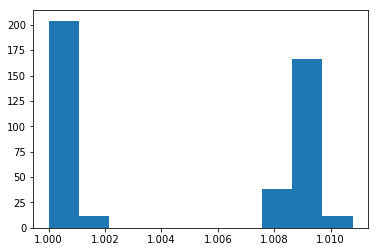

C colsample_bytree lambda_l2 learning_rate max_bin min_data_in_leaf  \
0  0.01              0.7         2          0.01     127               20   
1  0.01              0.5         2          0.01     127               10   
2  0.01              0.5         2          0.01     255               10   
3  0.01              0.5         2          0.01     127               30   
4  0.01              0.7         2          0.01     127               10   
5  0.01              0.5         2          0.01     255               10   
6  0.01              0.5         1          0.01     127               10   
7  0.01              0.7         2          0.01     255               30   
8  0.01              0.5         1          0.01     127               20   
9  0.01              0.7         2          0.01     127               10   

  min_sum_hessian_in_leaf num_leaves        objective subsample     score  
0                     0.1        127  regression_l1f6       0.8  0.067997  
1                    0.01        127  regression_l1f6       0.8  0.068002  
2                    0.01        255  regression_l1f6       0.8  0.068005  
3                    0.01        127  regression_l1f6       0.8  0.068008  
4                     0.1        255  regression_l1f6       0.8  0.068008  
5                   0.001        255  regression_l1f6       0.8  0.068009  
6                     0.1        255  regression_l1f6       0.8  0.068010  
7                     0.1        127  regression_l1f6       0.8  0.068010  
8                   0.001        127  regression_l1f6       0.8  0.068011  
9                    0.01        127  regression_l1f6       0.8  0.068012

In [19]:
i=6
key=keys[i]
param=f(keys[i])

In [20]:
xg_params[key]=param
param

{'C': 0.01,
 'colsample_bytree': 0.5,
 'lambda_l2': 2,
 'learning_rate': 0.01,
 'max_bin': 127,
 'min_data_in_leaf': 10,
 'min_sum_hessian_in_leaf': 0.01,
 'num_leaves': 127,
 'objective': 'regression_l1f6',
 'subsample': 0.80000000000000004}

In [21]:
len(xg_params),len(keys)

(7, 7)

In [22]:
xg_params

{'fair': {'C': 0.01,
  'colsample_bytree': 0.69999999999999996,
  'lambda_l2': 2,
  'learning_rate': 0.01,
  'max_bin': 127,
  'min_data_in_leaf': 30,
  'min_sum_hessian_in_leaf': 0.01,
  'num_leaves': 127,
  'objective': 'fair',
  'subsample': 0.80000000000000004},
 'huber': {'C': 0.01,
  'colsample_bytree': 0.5,
  'lambda_l2': 1,
  'learning_rate': 0.01,
  'max_bin': 255,
  'min_data_in_leaf': 30,
  'min_sum_hessian_in_leaf': 0.001,
  'num_leaves': 255,
  'objective': 'huber',
  'subsample': 0.80000000000000004},
 'l1.g': {'colsample_bytree': 0.5,
  'lambda_l2': 2,
  'learning_rate': 0.01,
  'max_bin': 127,
  'min_data_in_leaf': 70,
  'min_sum_hessian_in_leaf': 0.0001,
  'num_leaves': 255,
  'objective': 'regression_l1',
  'subsample': 0.80000000000000004},
 'l1f1': {'C': 0.01,
  'colsample_bytree': 0.5,
  'lambda_l2': 0,
  'learning_rate': 0.01,
  'max_bin': 255,
  'min_data_in_leaf': 70,
  'min_sum_hessian_in_leaf': 0.01,
  'num_leaves': 255,
  'objective': 'regression_l1f1',
  'su

In [23]:
import cPickle as pickle

In [24]:
pickle.dump(xg_params,open("lgb_params.pkl",'wb'))